In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import json




# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)



2024-04-22 13:42:30.421254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 13:42:30.421294: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Extract patterns and tags
patterns = []
tags = []
responses = []
tag_to_index = {}  # To map tags to numerical values
index_to_tag = {}  # To map numerical values back to tags


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from nltk.corpus import stopwords
import nltk
import json

In [4]:
for i, intent in enumerate(data['intents']):
    tag = intent['tag']
    tag_to_index[tag] = i
    index_to_tag[i] = tag

    # Apply preprocessing: removing stop words
    stop_words = set(stopwords.words('english'))
    cleaned_patterns = [word for word in intent['patterns'] if word.lower() not in stop_words]

    patterns.extend(cleaned_patterns)
    tags.extend([i] * len(cleaned_patterns))  # Use numerical values instead of strings
    responses.extend(intent['responses'])


In [5]:
#for i, intent in enumerate(data['intents']):
#    tag = intent['tag']
#    tag_to_index[tag] = i
#    index_to_tag[i] = tag

#    patterns.extend(intent['patterns'])
 #   tags.extend([i] * len(intent['patterns']))  # Use numerical values instead of strings
#    responses.extend(intent['responses'])

# Print the data
print("tag_to_index:", tag_to_index)
print("index_to_tag:", index_to_tag)
print("patterns:", patterns)
print("tags:", tags)
print("responses:", responses)


tag_to_index: {'wishing': 1, 'responses': 2, 'view_bill': 3, 'change_billing_address': 4, 'upgrade_downgrade_plan': 5, 'current_data_usage': 6, 'check_account_balance': 7, 'add_remove_services': 8, 'internet_not_working': 9, 'call_issues': 10, 'voicemail_setup': 11, 'no_service': 12, 'configure_apn_settings': 13}
index_to_tag: {0: 'wishing', 1: 'wishing', 2: 'responses', 3: 'view_bill', 4: 'change_billing_address', 5: 'upgrade_downgrade_plan', 6: 'current_data_usage', 7: 'check_account_balance', 8: 'add_remove_services', 9: 'internet_not_working', 10: 'call_issues', 11: 'voicemail_setup', 12: 'no_service', 13: 'configure_apn_settings'}
patterns: ['hi', 'how are you ?', 'hello', 'hi', 'how are you ?', 'hello', 'thank you', 'thanks a lot', 'appreciate it', 'How can I view my bill?', 'Where can I see my bill?', 'I need to check my bill, how can I do that?', 'How do I access my billing information?', 'Can you help me find my bill?', 'Where do I go to view my bill?', 'I want to see my bill.

In [6]:
# Tokenize the patterns
tokenizer = Tokenizer()
tokenizer.fit_on_texts(patterns)
total_words = len(tokenizer.word_index) + 1

# Display details
print("Total words after tokenization:", total_words)
print("Word index:", tokenizer.word_index)


Total words after tokenization: 248
Word index: {'my': 1, 'i': 2, 'to': 3, 'how': 4, 'do': 5, 'can': 6, 'what': 7, 'plan': 8, 'the': 9, 'is': 10, 'phone': 11, "what's": 12, 'you': 13, 'billing': 14, 'on': 15, 'for': 16, 'balance': 17, 'voicemail': 18, 'apn': 19, 'address': 20, 'internet': 21, 'services': 22, 'data': 23, "'no": 24, "service'": 25, 'bill': 26, 'should': 27, 'or': 28, 'account': 29, 'where': 30, "i'm": 31, 'steps': 32, 'current': 33, 'it': 34, 'me': 35, 'usage': 36, 'a': 37, 'need': 38, 'help': 39, 'calls': 40, 'find': 41, 'check': 42, 'change': 43, 'there': 44, 'working': 45, 'process': 46, 'upgrade': 47, 'adding': 48, 'removing': 49, 'with': 50, 'fix': 51, 'not': 52, 'up': 53, 'why': 54, 'settings': 55, 'access': 56, 'want': 57, 'take': 58, 'by': 59, 'setup': 60, 'does': 61, 'in': 62, 'update': 63, 'way': 64, 'connection': 65, 'call': 66, 'are': 67, 'guide': 68, 'procedure': 69, 'from': 70, 'if': 71, 'making': 72, 'receiving': 73, 'see': 74, 'that': 75, 'information': 7

In [7]:

# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)

# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)


In [8]:
# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)
# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)
# Display information about the training data
print("Input sequences:")
for seq in input_sequences:
    print(seq)

print("\nInput padded sequences:")
print(input_padded)

print("\nLabels (one-hot encoding):")
print(labels)


Input sequences:
[125]
[4, 67, 13]
[126]
[125]
[4, 67, 13]
[126]
[161, 13]
[162, 37, 163]
[164, 34]
[4, 6, 2, 84, 1, 26]
[30, 6, 2, 74, 1, 26]
[2, 38, 3, 42, 1, 26, 4, 6, 2, 5, 75]
[4, 5, 2, 56, 1, 14, 76]
[6, 13, 39, 35, 41, 1, 26]
[30, 5, 2, 85, 3, 84, 1, 26]
[2, 57, 3, 74, 1, 26, 7, 27, 2, 5]
[12, 9, 46, 16, 102, 1, 26]
[6, 13, 68, 35, 15, 4, 3, 42, 1, 26]
[31, 127, 16, 1, 26, 30, 5, 2, 41, 34]
[4, 6, 2, 56, 1, 14, 165]
[7, 32, 5, 2, 58, 3, 84, 1, 26]
[30, 5, 2, 41, 1, 14, 103]
[166, 13, 128, 35, 62, 167, 1, 26]
[31, 168, 3, 41, 1, 26, 86, 129]
[30, 6, 2, 56, 1, 169, 14, 76]
[12, 9, 69, 16, 102, 1, 26]
[4, 5, 2, 104, 3, 1, 26]
[31, 87, 62, 130, 1, 26, 12, 9, 46]
[12, 9, 170, 16, 102, 1, 26]
[6, 2, 63, 1, 14, 20]
[4, 5, 2, 43, 1, 14, 20]
[10, 34, 77, 3, 78, 1, 14, 20]
[30, 6, 2, 63, 1, 14, 20]
[6, 2, 43, 9, 20, 15, 1, 26]
[4, 5, 2, 105, 1, 14, 20]
[2, 38, 3, 43, 1, 14, 20, 4, 6, 2, 5, 75]
[12, 9, 46, 16, 131, 1, 14, 20]
[6, 13, 68, 35, 15, 4, 3, 63, 1, 14, 20]
[2, 57, 3, 63, 9, 14, 2

In [9]:

# Build the model
model = Sequential([
    Embedding(total_words, 16, input_length=input_padded.shape[1]),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(len(data['intents']), activation='softmax')
])

2024-04-22 13:42:35.684406: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-22 13:42:35.687971: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-22 13:42:35.688069: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2024-04-22 13:42:35.693868: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(input_padded, labels, epochs=1000)

# Save the model
model.save('chatbot_model.h5')


2024-04-22 13:42:37.792150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-22 13:42:37.805988: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2494195000 Hz


Epoch 1/1000
8/8 [==============================] - 1s 2ms/step - loss: 2.6380 - accuracy: 0.0917
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.6167 - accuracy: 0.2402
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.5972 - accuracy: 0.2926
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.5747 - accuracy: 0.3144
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.5488 - accuracy: 0.3712
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.5201 - accuracy: 0.4105
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.4837 - accuracy: 0.4585
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.4401 - accuracy: 0.4891
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.3859 - accuracy: 0.5066
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.3286 - accuracy: 0.5371
Epoch 11/1000
8/8 [

8/8 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9869
Epoch 84/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9869
Epoch 85/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9869
Epoch 86/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9738
Epoch 87/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 0.9869
Epoch 88/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9869
Epoch 89/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9869
Epoch 90/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9869
Epoch 91/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9782
Epoch 92/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9869
Epoch 93/1000
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9825
Epoch 166/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9869
Epoch 167/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9869
Epoch 168/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9869
Epoch 169/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9869
Epoch 170/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9825
Epoch 171/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9825
Epoch 172/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9869
Epoch 173/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9869
Epoch 174/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9869
Epoch 175/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9825
Epoch 248/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9869
Epoch 249/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9869
Epoch 250/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9869
Epoch 251/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9869
Epoch 252/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9869
Epoch 253/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0206 - accuracy: 0.9869
Epoch 254/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9869
Epoch 255/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9869
Epoch 256/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 257/1000


8/8 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9869
Epoch 330/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9825
Epoch 331/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9825
Epoch 332/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9869
Epoch 333/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9825
Epoch 334/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9869
Epoch 335/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 336/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 337/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9869
Epoch 338/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9869
Epoch 339/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9825
Epoch 411/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9825
Epoch 412/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0196 - accuracy: 0.9869
Epoch 413/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9782
Epoch 414/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9869
Epoch 415/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 416/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9825
Epoch 417/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9825
Epoch 418/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 419/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9825
Epoch 420/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9782
Epoch 492/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9825
Epoch 493/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 494/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 495/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0187 - accuracy: 0.9825
Epoch 496/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9825
Epoch 497/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 498/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9782
Epoch 499/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9913
Epoch 500/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9782
Epoch 501/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9825
Epoch 573/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9825
Epoch 574/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9782
Epoch 575/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9825
Epoch 576/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9825
Epoch 577/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9869
Epoch 578/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9825
Epoch 579/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9869
Epoch 580/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9869
Epoch 581/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9869
Epoch 582/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9869
Epoch 655/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9869
Epoch 656/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 657/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9825
Epoch 658/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9825
Epoch 659/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9869
Epoch 660/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9869
Epoch 661/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 662/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9869
Epoch 663/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9869
Epoch 664/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9869
Epoch 737/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9869
Epoch 738/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9869
Epoch 739/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 740/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9869
Epoch 741/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9825
Epoch 742/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9869
Epoch 743/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9869
Epoch 744/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 745/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9825
Epoch 746/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 819/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 820/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9782
Epoch 821/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9825
Epoch 822/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9825
Epoch 823/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9825
Epoch 824/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 825/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 826/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 827/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 828/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9825
Epoch 901/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9913
Epoch 902/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 903/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9738
Epoch 904/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9869
Epoch 905/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9825
Epoch 906/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9825
Epoch 907/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9825
Epoch 908/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9869
Epoch 909/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9825
Epoch 910/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9869
Epoch 983/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9869
Epoch 984/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9869
Epoch 985/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.9869
Epoch 986/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 987/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 0.9825
Epoch 988/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9825
Epoch 989/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 990/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9869
Epoch 991/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9869
Epoch 992/1000


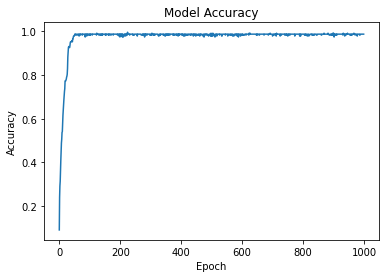

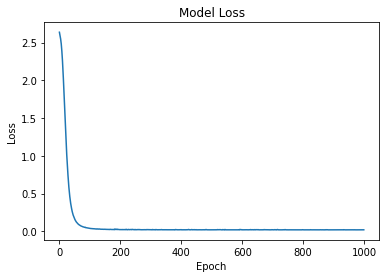

In [11]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


In [13]:
# Evaluate the model on the training data
predictions = model.predict(input_padded)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20

    accuracy                           0.99       229
   macro avg       0.89      0.93      0.90       229
weighted avg       0.98      0.99      0.98       229



/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Assume your data and labels are loaded and processed already

# Set up 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
all_true_labels = []
all_predicted_labels = []

# Iterate over the folds
for fold, (train_indices, test_indices) in enumerate(kfold.split(input_padded, np.argmax(labels, axis=1))):
    # Build the model
    model = Sequential([
        Embedding(total_words, 16, input_length=input_padded.shape[1]),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(len(data['intents']), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(input_padded[train_indices], labels[train_indices], epochs=100, verbose=0)

    # Evaluate the model on the test data for this fold
    predictions = model.predict(input_padded[test_indices])
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels[test_indices], axis=1)

    # Append true and predicted labels for later analysis
    all_true_labels.extend(true_labels)
    all_predicted_labels.extend(predicted_labels)

    # Print classification report for each fold
    print(f"\nClassification Report - Fold {fold + 1}:\n")
    print(classification_report(true_labels, predicted_labels))

# Print overall classification report
print("\nOverall Classification Report:\n")
print(classification_report(all_true_labels, all_predicted_labels))


/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,



Classification Report - Fold 1:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.75      0.75      0.75         4
           5       0.80      1.00      0.89         4
           6       0.80      1.00      0.89         4
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         4
           9       0.75      0.75      0.75         4
          10       0.80      1.00      0.89         4
          11       0.67      0.50      0.57         4
          12       1.00      0.75      0.86         4
          13       1.00      0.75      0.86         4

    accuracy                           0.80        46
   macro avg       0.72      0.71      0.71        46
weighted avg       0.81      0.80      0.80        46


Classification Report - Fold 2:

           

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 3:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.44      1.00      0.62         4
           4       1.00      0.75      0.86         4
           5       0.80      1.00      0.89         4
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4
           8       1.00      0.75      0.86         4
           9       0.50      0.25      0.33         4
          10       1.00      0.50      0.67         4
          11       0.67      1.00      0.80         4
          12       0.67      0.50      0.57         4
          13       0.60      0.75      0.67         4

    accuracy                           0.67        46
   macro avg       0.60      0.55      0.55        46
weighted avg       0.73      0.67      0.67   

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 4:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.33      0.25      0.29         4
           4       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       0.67      1.00      0.80         4
          10       1.00      0.50      0.67         4
          11       0.67      1.00      0.80         4
          12       1.00      0.75      0.86         4
          13       0.60      0.75      0.67         4

    accuracy                           0.78        46
   macro avg       0.72      0.70      0.69        46
weighted avg       0.81      0.78      0.78   

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 5:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.60      0.75      0.67         4
           5       0.67      1.00      0.80         4
           6       1.00      0.50      0.67         4
           7       0.80      1.00      0.89         4
           8       1.00      0.75      0.86         4
           9       1.00      1.00      1.00         4
          10       1.00      0.75      0.86         4
          11       0.67      1.00      0.80         4
          12       1.00      1.00      1.00         4
          13       1.00      0.75      0.86         4

    accuracy                           0.82        45
   macro avg       0.75      0.71      0.71        45
weighted avg       0.87      0.82      0.82        45


Overall Classification Report:

            

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm

In [15]:
#testing code on single sentence

In [16]:

# Test the model with user input
# Test the model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction
    prediction = model.predict(user_input_padded)
    

    # Get the predicted tag
    predicted_tag = index_to_tag[tf.argmax(prediction[0]).numpy()]  # Convert to numpy array
    print("the tag predicted is",predicted_tag)

    # Get a random response for the predicted tag
    response = data['intents'][tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response[0])



You: How do I add or remove services from my plan?
the tag predicted is add_remove_services
Chatbot: Yes, you can add or remove services from your plan by logging into your account and navigating to the plan customization section.


KeyboardInterrupt: Interrupted by user

In [16]:
import pickle

In [17]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [18]:
tokenizer

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import json
import pickle

# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)

# ... (rest of your code)

# Save the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tag_to_index.pickle', 'wb') as handle:
    pickle.dump(tag_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_tag.pickle', 'wb') as handle:
    pickle.dump(index_to_tag, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model
model.save('chatbot_model.h5')

# Loading the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

with open('tag_to_index.pickle', 'rb') as handle:
    loaded_tag_to_index = pickle.load(handle)

with open('index_to_tag.pickle', 'rb') as handle:
    loaded_index_to_tag = pickle.load(handle)

# Load the model
loaded_model = tf.keras.models.load_model('chatbot_model.h5')

# Test the loaded model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input using the loaded tokenizer
    user_input_sequence = loaded_tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(user_input_padded)
    print(prediction)

    # Get the predicted tag using the loaded mapping dictionaries
    predicted_tag = loaded_index_to_tag[tf.argmax(prediction[0]).numpy()]

    # Get a random response for the predicted tag
    response = data['intents'][loaded_tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response)


You: hi
[[5.0363266e-01 4.3111089e-01 3.2533307e-02 3.2686588e-04 1.0458020e-05
  6.8673212e-04 5.0559947e-03 3.0980550e-04 7.1587245e-05 4.8576835e-06
  8.5086143e-03 1.0895198e-02 8.3565674e-06 6.8447543e-03]]
Chatbot: ["Hi there, hope you're having a fantastic day!", "Hello! I'm here to assist you in any way I can.", 'Hey, good to see you! What can I help you with today?', "Hi! I'm doing well, thank you. How about yourself?", "Hello, I'm glad you stopped by. What brings you here?", "Hey, hope you're doing well. How may I assist you?", "Hi, it's great to connect with you. What can I do for you?", "Hello! I'm here and ready to help. What do you need?", "Hey there! I'm here to lend a helping hand.", "Hi! How's your day going so far?", 'Hello, nice to meet you! How can I be of service?', 'Hi, hope everything is going smoothly for you.', 'Hello, how can I assist you today?', "Hey, hope you're doing fantastic. What can I do for you?", "Hi there! I'm here to assist you with anything you ne

KeyboardInterrupt: Interrupted by user